In [1]:
%%time
from syntheticDBN import Bayes_Test
import pandas as pd
import matplotlib.pyplot as plt
import pyAgrum.lib.notebook as gnb
%matplotlib widget

Wall time: 3.69 s


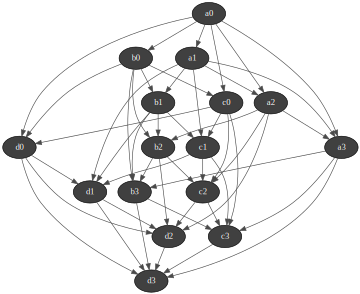

Wall time: 157 ms


In [2]:
%%time
# Create True DBN
timesteps = 4
nodes = 4
bayestest = Bayes_Test(timesteps=timesteps, nodes=nodes, type='connected') 

gnb.show(bayestest.true_dbn)

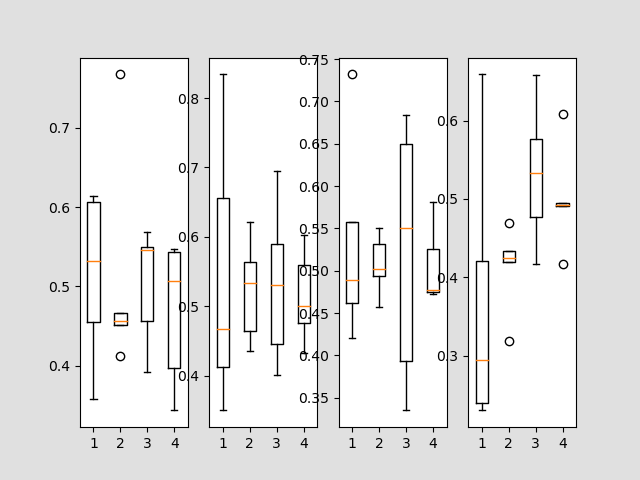

Wall time: 19.8 s


,a3.1,b3.1,c3.1,d3.1,a3.2,b3.2,c3.2,d3.2,a3.3,b3.3,c3.3,d3.3,a3.4,b3.4,c3.4,d3.4
0,0.614,0.767,0.392,0.507,0.656,0.621,0.590,0.559,0.732,0.494,0.650,0.477,0.421,0.469,0.417,0.491
1,0.358,0.456,0.550,0.398,0.413,0.436,0.695,0.501,0.489,0.502,0.393,0.526,0.239,0.433,0.577,0.492
2,0.532,0.452,0.569,0.344,0.467,0.464,0.531,0.603,0.558,0.532,0.684,0.581,0.659,0.419,0.477,0.417
3,0.606,0.466,0.457,0.543,0.350,0.564,0.401,0.476,0.420,0.550,0.550,0.475,0.230,0.318,0.533,0.609
4,0.455,0.412,0.546,0.547,0.834,0.534,0.446,0.432,0.462,0.457,0.335,0.473,0.294,0.425,0.658,0.495


In [3]:
%%time
# Score classifiers
targets = list(sorted(bayestest.true_dbn.names(), key=lambda x: x[::-1]))[-nodes:]

scores = pd.DataFrame()
# fig, axs = plt.subplots(1, timesteps)

for timestep in range(1, timesteps + 1):
    score = bayestest.time_test(targets=targets, timesteps=timestep, structure='hill')
    scores = pd.concat([scores, score], axis=1)
    
#     axs[timestep-1].boxplot(score)

# plt.show()
scores

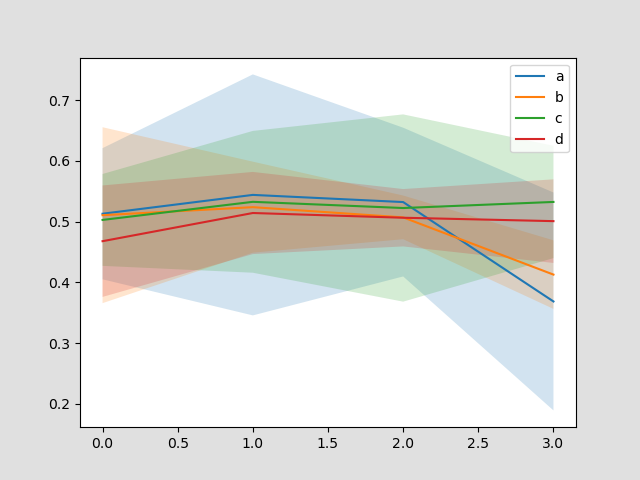

,a3.1,b3.1,c3.1,d3.1,a3.2,b3.2,c3.2,d3.2,a3.3,b3.3,c3.3,d3.3,a3.4,b3.4,c3.4,d3.4
Mean,0.513000,0.510600,0.502800,0.467800,0.544000,0.523800,0.532600,0.514200,0.532200,0.507000,0.522400,0.50640,0.368600,0.412800,0.5324,0.500800
STD,0.107935,0.144799,0.075582,0.091737,0.198349,0.074921,0.116715,0.067607,0.122443,0.035944,0.154128,0.04721,0.179339,0.056438,0.0924,0.068806


In [4]:
mean_scores = pd.DataFrame([scores.mean(), scores.std()], index=['Mean','STD'])

line_scores = {}
line_min = {}
line_max = {}
for i, v in mean_scores.squeeze().items():
    if i[0] in line_scores.keys():
        line_scores[i[0]].append(v[0])
        line_min[i[0]].append(v[0] - v[1])
        line_max[i[0]].append(v[0] + v[1])
    else:
        line_scores[i[0]] = [v[0]]
        line_min[i[0]] = [v[0] - v[1]]
        line_max[i[0]] = [v[0] + v[1]]

plt.figure()
# colors = ['blue', 'red', 'green', 'purple', 'yellow', 'orange', 'cyan']
for key, data in line_scores.items():
    plt.plot(data, label=key)
    plt.fill_between(range(len(data)), line_min[key], line_max[key], alpha=0.2)
plt.legend()
plt.show()

mean_scores